# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- **Nama:** Naufal Fadli Muzakki
- **Email:** 222112245@stis.ac.id
- **ID Dicoding:** nf_muzakki

## Persiapan

### Menyiapkan library yang dibutuhkan
Pada awalnya, semua packages/library dimuat untuk membantu melakukan analisis

In [1]:
# Library dasar python
import pandas as pd
import numpy as np
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Library untuk preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Library untuk Modelling dan Hyperparameter Tuning 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import optuna
from optuna.samplers import TPESampler

# === Library untuk Evaluasi Model ===
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report, confusion_matrix

### Menyiapkan data yang akan diguankan

In [2]:
# Import Dataset dari Dicoding GitHub Repository
dataset_url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'

# Read dataset
df = pd.read_csv(dataset_url, delimiter=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


**Penjelasan:**

Dalam proyek ini digunakan dataset **"Students' Performance"** yang tersedia pada [GitHub](https://github.com/dicodingacademy/dicoding_dataset/tree/main/students_performance). Kumpulan data yang dibuat dari lembaga pendidikan tinggi (diperoleh dari beberapa basis data terpisah) yang terkait dengan mahasiswa yang terdaftar dalam berbagai gelar sarjana, seperti agronomi, desain, pendidikan, keperawatan, jurnalisme, manajemen, layanan sosial, dan teknologi. Kumpulan data tersebut mencakup informasi yang diketahui pada saat pendaftaran mahasiswa (jalur akademik, demografi, dan faktor sosial-ekonomi) dan kinerja akademik mahasiswa pada akhir semester pertama dan kedua. Data tersebut digunakan untuk membangun model klasifikasi guna memprediksi dropout dan keberhasilan akademik mahasiswa. Berikut merupakan penjelasan variabel-bariabel dalam dataset tersebut:

* **Marital status**: Status pernikahan mahasiswa. (Kategorik)
* **Application mode**: Metode pendaftaran mahasiswa. (Kategorik)
* **Application order**: Urutan pilihan program studi saat mendaftar (0 berarti pilihan utama; 9 pilihan terakhir). (Numerik)
* **Course**: Program studi yang diambil oleh mahasiswa. (Kategorik)
* **Daytime/evening attendance**: Jadwal kehadiran kelas mahasiswa. (Kategorik) 1 – Siang, 0 – Malam
* **Previous qualification**: Kualifikasi pendidikan terakhir sebelum masuk perguruan tinggi. (Kategorik)
* **Previous qualification (grade)**: Nilai dari kualifikasi pendidikan sebelumnya (skala 0–200). (Numerik)
* **Nacionality**: Kebangsaan mahasiswa. (Kategorik)
* **Mother's qualification**: Kualifikasi pendidikan ibu mahasiswa. (Kategorik)
* **Father's qualification**: Kualifikasi pendidikan ayah mahasiswa. (Kategorik)
* **Mother's occupation**: Pekerjaan ibu mahasiswa. (Kategorik)
* **Father's occupation**: Pekerjaan ayah mahasiswa. (Kategorik)
* **Admission grade**: Nilai masuk mahasiswa saat pendaftaran (skala 0–200). (Numerik)
* **Displaced**: Apakah mahasiswa tinggal jauh dari tempat asalnya (terpaksa pindah/dipindahkan). (Kategorik) 1 – Ya, 0 – Tidak
* **Educational special needs**: Apakah mahasiswa memiliki kebutuhan pendidikan khusus. (Kategorik) 1 – Ya, 0 – Tidak
* **Debtor**: Apakah mahasiswa memiliki utang (misalnya tunggakan biaya). (Kategorik) 1 – Ya, 0 – Tidak
* **Tuition fees up to date**: Apakah pembayaran biaya kuliah mahasiswa lancar. (Kategorik) 1 – Ya, 0 – Tidak
* **Gender**: Jenis kelamin mahasiswa. (Kategorik) 1 – Laki-laki, 0 – Perempuan
* **Scholarship holder**: Apakah mahasiswa penerima beasiswa. (Kategorik) 1 – Ya, 0 – Tidak
* **Age at enrollment**: Usia mahasiswa saat mendaftar/mulai kuliah. (Numerik)
* **International**: Apakah mahasiswa adalah mahasiswa internasional. (Kategorik) 1 – Ya, 0 – Tidak
* **Curricular units 1st sem (credited)**: Jumlah mata kuliah semester 1 yang diakui dari sebelumnya (diakreditasi). (Numerik)
* **Curricular units 1st sem (enrolled)**: Jumlah mata kuliah semester 1 yang diambil/didaftarkan. (Numerik)
* **Curricular units 1st sem (evaluations)**: Jumlah mata kuliah semester 1 yang telah dinilai/dievaluasi. (Numerik)
* **Curricular units 1st sem (approved)**: Jumlah mata kuliah semester 1 yang lulus/berhasil disetujui. (Numerik)

## Data Understanding

### Data Summary

In [3]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


**Penjelasan:**

Pada tahap ini ditampilkan rigkasan awal dan ringkasan statistik deskriptif dari dataset untuk mengetahui gambaran awal dataset. Berdasarkan ringkasan dataset dan statistik deskriptif, banyak variabel yang disajikan dalam bentuk encode (numerik) yang sebenearnya merupakan kategorik, oleh karena itu perlu dilakukan decoding pada tahap Data Preprocessing untuk keperluan pembuatan dashboard.

### Check Data Duplikat

In [5]:
# Cek jumlah data duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

# Tampilkan baris yang duplikat (jika ada)
if duplicate_count > 0:
    print("Baris duplikat:")
    print(df[df.duplicated()])

Jumlah data duplikat: 0


**Penjelasan:**

Dilakukan pengecekan apakah terdapat data duplikat. Setelah dilakukan pengecekan didapatkan tidak ada baris duplikat di dalam dataset. Karena itu, tidak ada baris yang perlu dihapus dengan drop_duplicates().

### Checking Missing Value

In [6]:
# Cek keberadaaan missing value pada setiap variabel
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


**Penjelasan:**

Pada tahap ini dilakukan pengecekan keberadaaan missing value pada seluruh variabel/fitur yang ada di dataset. Dair hasil diatas diketahui bahwa tidak ditemukan adanya missing value pada keseluruhan variabel, sehingga tidak perlu dilakukan penanganan missing value.

### Exploratory Data Analysis

In [7]:
numerical, categorical = [], []

for feature in df.columns:
    if df[feature].dtype != 'object':
        numerical.append(feature)
    else:
        categorical.append(feature)

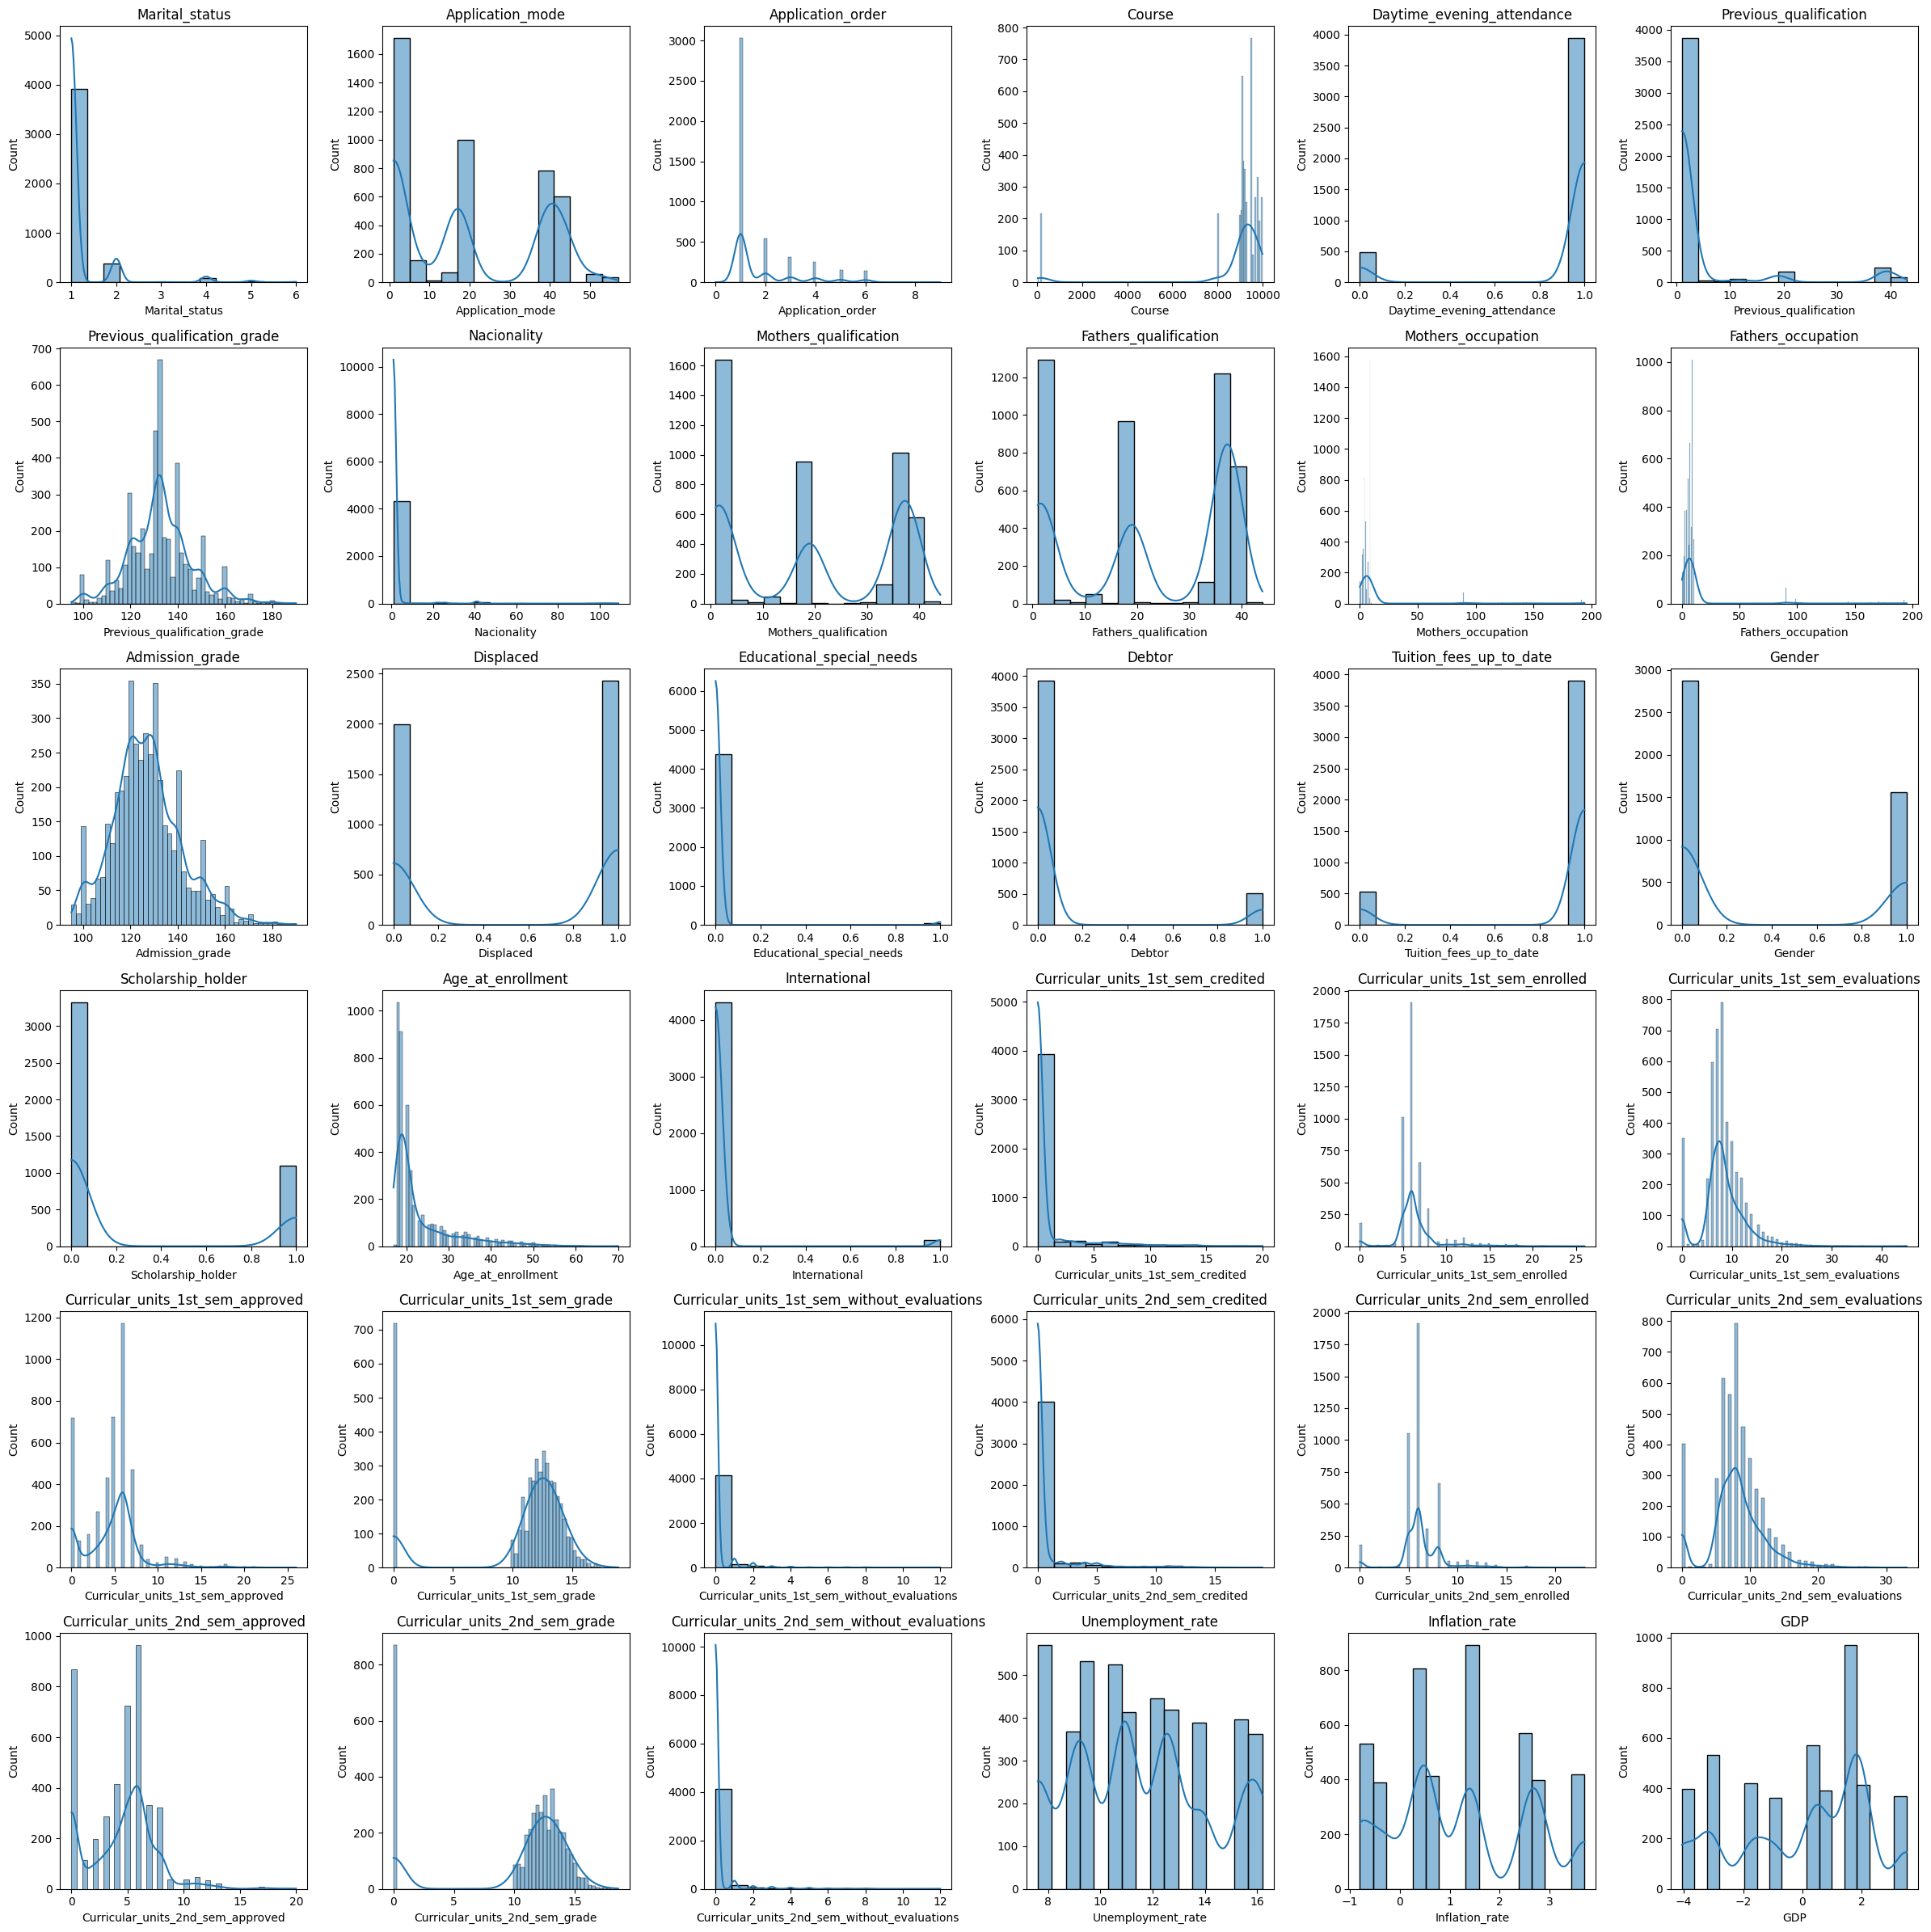

In [8]:
# Daftar kolom numerik
num_cols = df[numerical].columns
n_cols = len(num_cols)

# Hitung jumlah baris dan kolom optimal untuk subplot grid
n_per_row = 6
n_rows = int(np.ceil(n_cols / n_per_row))

# Buat grid subplot
fig, ax = plt.subplots(n_rows, n_per_row, figsize=(4 * n_per_row, 4 * n_rows))
ax = ax.flatten()

# Plot distribusi masing-masing kolom
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i])
    ax[i].set_title(col)

# Hapus subplot yang tidak terpakai
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


**Penjelasan:**

Pada tahap ini ditampilkan visualisasi histogram dari seluruh variabel dalam dataset dilakukan untuk memahami **karakteristik distribusi** masing-masing fitur, baik numerik maupun kategorikal.

1. **Variabel Kategorikal (Diskrit):**

   * Beberapa variabel seperti `Marital_status`, `Application_mode`, `Course`, `Nationality`, `Mothers_qualification`, dan `Fathers_qualification` menunjukkan distribusi **diskrit** dengan jumlah kategori terbatas.
   * Distribusi tidak merata; terdapat dominasi pada kategori tertentu, misalnya pada `Gender`, sebagian besar mahasiswa berjenis kelamin tertentu (didominasi oleh nilai 1).

2. **Variabel Numerik:**

   * Banyak variabel numerik seperti `Admission_grade`, `Age_at_enrollment`, dan `curricular_units_*` memiliki **distribusi miring ke kanan (right-skewed)**, menunjukkan adanya outlier atau rentang nilai yang lebar.
   * `Admission_grade` dan `Previous_qualification_grade` cenderung berdistribusi normal atau mendekati normal.
   * Variabel `GPA` tidak tersedia secara eksplisit, namun `Admission_grade` dapat menjadi proksi yang menggambarkan kemampuan awal mahasiswa.

3. **Variabel Biner:**

   * Banyak fitur seperti `Debtor`, `Scholarship_holder`, `Displaced`, `Educational_special_needs`, `Tuition_fees_up_to_date`, dan `International` merupakan fitur biner (0/1).
   * Hampir semua fitur biner ini memiliki distribusi yang sangat **tidak seimbang**, misalnya mayoritas mahasiswa tidak memiliki beasiswa (`Scholarship_holder = 0`) atau tidak memiliki kebutuhan khusus (`Educational_special_needs = 0`).

4. **Kondisi Ekonomi Makro:**

   * Variabel `Unemployment_rate`, `Inflation_rate`, dan `GDP` menunjukkan **variasi yang lebih halus**, mencerminkan perubahan dari waktu ke waktu. Ketiganya menunjukkan bahwa data mencakup mahasiswa dari tahun akademik yang berbeda.


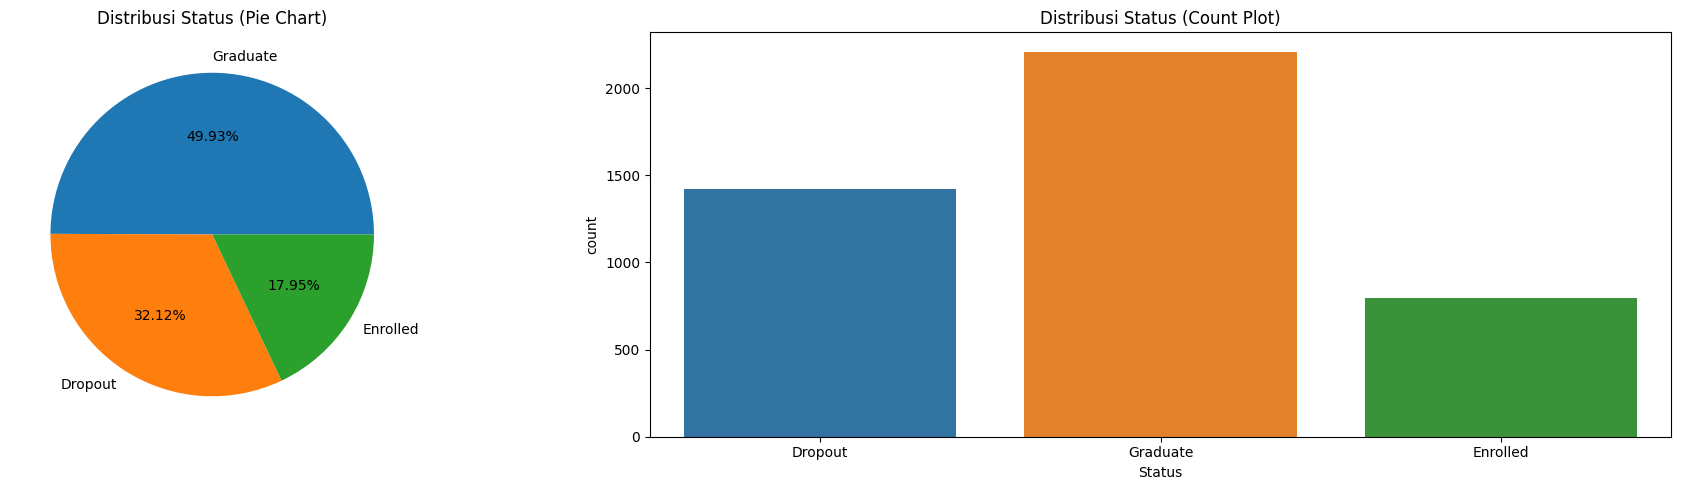

In [9]:
# Tentukan nama kolom target
col = 'Status'

# Buat subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Hitung frekuensi nilai unik dari kolom target
tdf = df[col].value_counts().reset_index()
tdf.columns = [col, 'count']  # Rename kolom agar sesuai

# Pie chart
ax[0].pie(tdf['count'], labels=tdf[col], autopct='%.2f%%')
ax[0].set_title('Distribusi Status (Pie Chart)')
ax[0].set_aspect('equal')

# Countplot
sns.countplot(data=df, x=col, ax=ax[1])
ax[1].set_title('Distribusi Status (Count Plot)')

plt.tight_layout()
plt.show()

**Penjelasan:**

Pada tahap ini dilakukan eksplorasi data untuk melihat distribusi dari variabel target yaitu status mahasiswa.

Berdasarkan visualisasi dalam bentuk diagram pie dan bar, terlihat bahwa mayoritas data berada pada kategori "Graduate", dengan proporsi sebesar 49,93% dari total observasi. Selanjutnya disusul dengan kategori "Dropout" yang menunjukkan proporsi yang cukup besar yaitu 32,12%. Sementara itu, kategori Enrolled merupakan kelas minoritas dengan proporsi sebesar 16,92%.

Distribusi ini menunjukkan adanya ketidakseimbangan kelas (class imbalance) pada variabel target. Dalam situasi seperti ini, penggunaan metrik evaluasi yang tepat menjadi sangat penting, karena metrik seperti akurasi saja dapat memberikan gambaran yang menyesatkan. Oleh karena itu, pendekatan yang digunakan dalam analisis ini adalah dengan memilih metrik yang lebih representatif terhadap performa model pada kedua kelas, seperti F1-score dan Balanced Accuracy. Metrik-metrik ini mampu memberikan penilaian yang lebih adil terhadap kemampuan model dalam mengklasifikasikan kelas minoritas, yang merupakan fokus utama dalam kasus ini.

## Data Preparation / Preprocessing

### Persiapan Dataset untuk Dashboard


Untuk keperluan pembuatan dashboard, perlu dilakukan label decoding untuk fitur-fitur dibawah ini:

| Features | 0 | 1 | 2 | 3 | 4 | 5 | 6 |
|----------|---|---|---|---|---|---|---|
| **Marital_status** | - | Single | Married | Widower | Divorced | Facto Union | Legally Seperated |
| **Daytime_evening_attendance** | Evening | Daytime | - | - | - | - | - |
| **Displaced** | No | Yes | - | - | - | - | - |
| **Educational_special_needs** | No | Yes | - | - | - | - | - |
| **Debtor** | No | Yes | - | - | - | - | - |
| **Tuition_fees_up_to_date** | No | Yes | - | - | - | - | - |
| **Gender** | Female | Male | - | - | - | - | - |
| **Scholarship_holder** | No | Yes | - | - | - | - | - |
| **International** | No | Yes | - | - | - | - | - |

<br>

<details>
<summary><b>Application_mode</b></summary>
1 - 1st Phase - General Contingent<br>
2 - Ordinance No. 612/93<br>
5 - 1st Phase - Special Contingent (Azores Island)<br>
7 - Holders of Other Higher Courses<br>
10 - Ordinance No. 854-B/99<br>
15 - International Student (Bachelor)<br>
16 - 1st phase - Special Contingent (Madeira Island)<br>
17 - 2nd phase - General Contingent<br>
18 - 3rd phase - General Contingent<br>
26 - Ordinance No. 533-A/99, Item B2 (Different Plan)<br>
27 - Ordinance No. 533-A/99, Item B3 (Other Institution)<br>
39 - Over 23 Years Old<br>
42 - Transfer<br>
43 - Change of Course<br>
44 - Technological Specialization Diploma Holders<br>
51 - Change of Institution/Course<br>
53 - Short Cycle Diploma Holders<br>
57 - Change of Institution/Course (International)<br>
</details>

<br>

<details>
<summary><b>Course</b></summary>
33 - Biofuel Production Technologies<br>
171 - Animation and Multimedia Design<br>
8014 - Social Service (Evening Attendance)<br>
9003 - Agronomy<br>
9070 - Communication Design<br>
9085 - Veterinary Nursing<br>
9119 - Informatics Engineering<br>
9130 - Equinculture<br>
9147 - Management<br>
9238 - Social Service<br>
9254 - Tourism<br>
9500 - Nursing<br>
9556 - Oral Hygiene<br>
9670 - Advertising and Marketing Management<br>
9773 - Journalism and Communication<br>
9853 - Basic Education<br>
9991 - Management (Evening Attendance)<br>
</details>

<br>

<details>
<summary><b>Previous_qualification</b></summary>
1 - Secondary Education<br>
2 - Higher Education - Bachelor's Degree<br>
3 - Higher Education - Degree<br>
4 - Higher Education - Master's<br>
5 - Higher Education - Doctorate<br>
6 - Frequency of Higher Education<br>
9 - 12th Year of Schooling - Not Completed<br>
10 - 11th Year of Schooling - Not Completed<br>
12 - Other - 11th Year of Schooling<br>
14 - 10th Year of Schooling<br>
15 - 10th Year of Schooling - Not Completed<br>
19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.<br>
38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.<br>
39 - Technological Specialization Course<br>
40 - Higher Education - Degree (1st Cycle)<br>
42 - Professional Higher Technical Course<br>
43 - Higher Education - Master (2nd Cycle)<br>
</details>

<br>

<details>
<summary><b>Nacionality</b></summary>
1 - Portuguese<br>
2 - German<br>
6 - Spanish<br>
11 - Italian<br>
13 - Dutch<br>
14 - English<br>
17 - Lithuanian<br>
21 - Angolan<br>
22 - Cape Verdean<br>
24 - Guinean<br>
25 - Mozambican<br>
26 - Santomean<br>
32 - Turkish<br>
41 - Brazilian<br>
62 - Romanian<br>
100 - Moldova (Republic of)<br>
101 - Mexican<br>
103 - Ukrainian<br>
105 - Russian<br>
108 - Cuban<br>
109 - Colombian<br>
</details>

<br>

<details>
<summary><b>Mothers_qualification & Fathers_qualification</b></summary>
1 - Secondary Education - 12th Year of Schooling or Eq.<br>
2 - Higher Education - Bachelor's Degree<br>
3 - Higher Education - Degree<br>
4 - Higher Education - Master's<br>
5 - Higher Education - Doctorate<br>
6 - Frequency of Higher Education<br>
9 - 12th Year of Schooling - Not Completed<br>
10 - 11th Year of Schooling - Not Completed<br>
11 - 7th Year (Old)<br>
12 - Other - 11th Year of Schooling<br>
13 - 2nd Year Complementary High School Course<br>
14 - 10th Year of Schooling<br>
18 - General Commerce Course<br>
19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.<br>
20 - Complementary High School Course<br>
22 - Technical - Professional Course<br>
25 - Complementary High School Course - Not Concluded<br>
26 - 7th Year of Schooling<br>
27 - 2nd Cycle of the General High School Course<br>
29 - 9th Year of Schooling - Not Completed<br>
30 - 8th Year of Schooling<br>
31 - General Course of Administration and Commerce<br>
33 - Supplementary Accounting and Administration<br>
34 - Unknown<br>
35 - Can't Read or Write<br>
36 - Can Read Without Having a 4th Year of Schooling<br>
37 - Basic Education 1st Cycle (4th/5th Year) or Equiv.<br>
38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.<br>
39 - Technological Specialization Course<br>
40 - Higher Education - Degree (1st Cycle)<br>
41 - Specialized Higher Studies Course<br>
42 - Professional Higher Technical Course<br>
43 - Higher Education - Master (2nd Cycle)<br>
44 - Higher Education - Doctorate (3rd Cycle)<br>
</details>

<br>

<details>
<summary><b>Mothers_occupation & Fathers_occupation</b></summary>
0 - Student<br>
1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers<br>
2 - Specialists in Intellectual and Scientific Activities<br>
3 - Intermediate Level Technicians and Professions<br>
4 - Administrative Staff<br>
5 - Personal Services, Security and Safety Workers and Sellers<br>
6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry<br>
7 - Skilled Workers in Industry, Construction and Craftsmen<br>
8 - Installation and Machine Operators and Assembly Workers<br>
9 - Unskilled Workers<br>
10 - Armed Forces Professions<br>
90 - Other Situation<br>
99 - (Blank)<br>
101 - Armed Forces Officers<br>
102 - Armed Forces Sergeants<br>
103 - Other Armed Forces Personnel<br>
112 - Directors of Administrative and Commercial Services<br>
114 - Hotel, Catering, Trade and Other Services Directors<br>
121 - Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques<br>
122 - Health Professionals<br>
123 - Teachers<br>
124 - Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations<br>
125 - Specialists in Information and Communication Technologies (ICT)<br>
131 - Intermediate Level Science and Engineering Technicians and Professions<br>
132 - Technicians and Professionals, of Intermediate Level of Health<br>
134 - Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services<br>
135 - Information and Communication Technology Technicians<br>
141 - Office Workers, Secretaries in General and Data Processing Operators<br>
143 - Data, Accounting, Statistical, Financial Services and Registry-Related Operators<br>
144 - Other Administrative Support Staff<br>
151 - Personal Service Workers<br>
152 - Sellers<br>
153 - Personal Care Workers and the Like<br>
154 - Protection and Security Services Personnel<br>
161 - Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers<br>
163 - Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence<br>
171 - Skilled Construction Workers and the Like, Except Electricians<br>
172 - Skilled Workers in Metallurgy, Metalworking and Similar<br>
173 - Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like<br>
174 - Skilled Workers in Electricity and Electronics<br>
175 - Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts<br>
181 - Fixed Plant and Machine Operators<br>
182 - Assembly Workers<br>
183 - Vehicle Drivers and Mobile Equipment Operators<br>
191 - Cleaning Workers<br>
192 - Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry<br>
193 - Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport<br>
194 - Meal Preparation Assistants<br>
195 - Street Vendors (Except Food) and Street Service Providers<br>
</details>

In [10]:
# @title Label Decoding Function
def label_decoding(df, feature):
    """
    Transform encoded feature in a DataFrame to their respective categorical labels

    Parameters
        df (pandas.DataFrame) : The DataFrame containing the feature to be transformed
        feature (str or list of str) : The name of the feature to be transformed

    Returns
        pandas.DataFrame : The DataFrame with the specified feature as categorical labels
    """

    category_mappings = {
        'Marital_status': {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
                           5: 'Facto Union', 6: 'Legally Seperated'},
        'Daytime_evening_attendance': {0: 'Evening', 1: 'Daytime'},
        'Gender': {0: 'Female', 1: 'Male'},
        'Application_mode' : {
            1: '1st Phase - General Contingent',
            2: 'Ordinance No. 612/93',
            5: '1st Phase - Special Contingent (Azores Island)',
            7: 'Holders of Other Higher Courses',
            10: 'Ordinance No. 854-B/99',
            15: 'International Student (Bachelor)',
            16: '1st Phase - Special Contingent (Madeira Island)',
            17: '2nd Phase - General Contingent',
            18: '3rd Phase - General Contingent',
            26: 'Ordinance No. 533-A/99, Item B2 (Different Plan)',
            27: 'Ordinance No. 533-A/99, Item B3 (Other Institution)',
            39: 'Over 23 Years Old',
            42: 'Transfer',
            43: 'Change of Course',
            44: 'Technological Specialization Diploma Holders',
            51: 'Change of Institution/Course',
            53: 'Short Cycle Diploma Holders',
            57: 'Change of Institution/Course (International)'
        },
        'Course': {
            33: 'Biofuel Production Technologies',
            171: 'Animation and Multimedia Design',
            8014: 'Social Service (Evening Attendance)',
            9003: 'Agronomy',
            9070: 'Communication Design',
            9085: 'Veterinary Nursing',
            9119: 'Informatics Engineering',
            9130: 'Equinculture',
            9147: 'Management',
            9238: 'Social Service',
            9254: 'Tourism',
            9500: 'Nursing',
            9556: 'Oral Hygiene',
            9670: 'Advertising and Marketing Management',
            9773: 'Journalism and Communication',
            9853: 'Basic Education',
            9991: 'Management (Evening Attendance)'
        },
        'Nacionality': {
            1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
            13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
            22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
            26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian',
            100: 'Moldova (Republic of)', 101: 'Mexican', 103: 'Ukrainian',
            105: 'Russian', 108: 'Cuban', 109: 'Colombian'
        },
        'Qualification': {
            1: 'Secondary Education - 12th Year of Schooling or Eq.',
            2: "Higher Education - Bachelor's Degree",
            3: 'Higher Education - Degree',
            4: "Higher Education - Master's",
            5: 'Higher Education - Doctorate',
            6: 'Frequency of Higher Education',
            9: '12th Year of Schooling - Not Completed',
            10: '11th Year of Schooling - Not Completed',
            11: '7th Year (Old)',
            12: 'Other - 11th Year of Schooling',
            13: '2nd Year Complementary High School Course',
            14: '10th Year of Schooling',
            15: '10th Year of Schooling - Not Completed',
            18: 'General Commerce Course',
            19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
            20: 'Complementary High School Course',
            22: 'Technical - Professional Course',
            25: 'Complementary High School Course - Not Concluded',
            26: '7th Year of Schooling',
            27: '2nd Cycle of the General High School Course',
            29: '9th Year of Schooling - Not Completed',
            30: '8th Year of Schooling',
            31: 'General Course of Administration and Commerce',
            33: 'Supplementary Accounting and Administration',
            34: 'Unknown',
            35: "Can't Read or Write",
            36: 'Can Read Without Having a 4th Year of Schooling',
            37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
            38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
            39: 'Technological Specialization Course',
            40: 'Higher Education - Degree (1st Cycle)',
            41: 'Specialized Higher Studies Course',
            42: 'Professional Higher Technical Course',
            43: 'Higher Education - Master (2nd Cycle)',
            44: 'Higher Education - Doctorate (3rd Cycle)'
        },
        'Occupation': {
            0: 'Student',
            1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
            2: 'Specialists in Intellectual and Scientific Activities',
            3: 'Intermediate Level Technicians and Professions',
            4: 'Administrative Staff',
            5: 'Personal Services, Security and Safety Workers and Sellers',
            6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
            7: 'Skilled Workers in Industry, Construction and Craftsmen',
            8: 'Installation and Machine Operators and Assembly Workers',
            9: 'Unskilled Workers',
            10: 'Armed Forces Professions',
            90: 'Other Situation',
            99: '(Blank)',
            101: 'Armed Forces Officers',
            102: 'Armed Forces Sergeants',
            103: 'Other Armed Forces Personnel',
            112: 'Directors of Administrative and Commercial Services',
            114: 'Hotel, Catering, Trade and Other Services Directors',
            121: 'Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques',
            122: 'Health Professionals',
            123: 'Teachers',
            124: 'Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations',
            125: 'Specialists in Information and Communication Technologies (ICT)',
            131: 'Intermediate Level Science and Engineering Technicians and Professions',
            132: 'Technicians and Professionals, of Intermediate Level of Health',
            134: 'Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services',
            135: 'Information and Communication Technology Technicians',
            141: 'Office Workers, Secretaries in General and Data Processing Operators',
            143: 'Data, Accounting, Statistical, Financial Services and Registry-Related Operators',
            144: 'Other Administrative Support Staff',
            151: 'Personal Service Workers',
            152: 'Sellers',
            153: 'Personal Care Workers and the Like',
            154: 'Protection and Security Services Personnel',
            161: 'Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers',
            163: 'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence',
            171: 'Skilled Construction Workers and the Like, Except Electricians',
            172: 'Skilled Workers in Metallurgy, Metalworking and Similar',
            173: 'Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like',
            174: 'Skilled Workers in Electricity and Electronics',
            175: 'Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts',
            181: 'Fixed Plant and Machine Operators',
            182: 'Assembly Workers',
            183: 'Vehicle Drivers and Mobile Equipment Operators',
            191: 'Cleaning Workers',
            192: 'Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry',
            193: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport',
            194: 'Meal Preparation Assistants',
            195: 'Street Vendors (Except Food) and Street Service Providers'
        }
    }

    category_mappings['Previous_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_qualification'] = category_mappings['Qualification']
    category_mappings['Fathers_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_occupation'] = category_mappings['Occupation']
    category_mappings['Fathers_occupation'] = category_mappings['Occupation']

    binary_features = ['Displaced', 'Educational_special_needs', 'Debtor',
                       'Tuition_fees_up_to_date', 'Scholarship_holder',
                       'International']
    binary_mapping = {0: 'No', 1: 'Yes'}

    features = [feature] if isinstance(feature, str) else feature

    for f in features:
        if f in category_mappings:
            df[f] = df[f].map(category_mappings[f])
        elif f in binary_features:
            df[f] = df[f].map(binary_mapping)

    return df

In [11]:
df_dashboard = df.copy()

df_dashboard = label_decoding(df_dashboard, ['Marital_status', 'Application_mode', 'Course',
                                 'Daytime_evening_attendance',
                                 'Previous_qualification', 'Nacionality',
                                 'Mothers_qualification', 'Fathers_qualification',
                                 'Mothers_occupation', 'Fathers_occupation',
                                 'Displaced', 'Educational_special_needs' ,
                                 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
                                 'Scholarship_holder', 'International'])

In [12]:
# Dataset for Business Dashboard
df_dashboard.to_csv('student_data_dashboard.csv', index=False)

### Label Encoding

Label feature Encoding untuk variabel target "Status"

In [13]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

Di sini, saya akan drop mahasiswa dengan status "enrolled". Ini akan membuat model bekerja lebih baik karena akan menjadi klasifikasi biner. Selain itu, hal ini dilakukan karena meneyesuaikan dengan kebutuhan analisis yang berfokus pada mahasiswa yang dropout.

In [14]:
df = df[df['Status'] != 1]
df = df.reset_index(drop=True)

df.loc[:, 'Status'] = df['Status'].replace({2: 1})
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
3626,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
3627,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
3628,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [15]:
df['Status'].value_counts()

Status
1    2209
0    1421
Name: count, dtype: int64

Dalam pemodelan nantinya, fitur label yang digunakan adalah Status, apakah siswa tersebut graduated atau dropout.

### Feature Selection

Pada tahap ini, feature selection dilakukan berdasarkan korelasi setiap fitur terhadap varibel target ```Status``` 

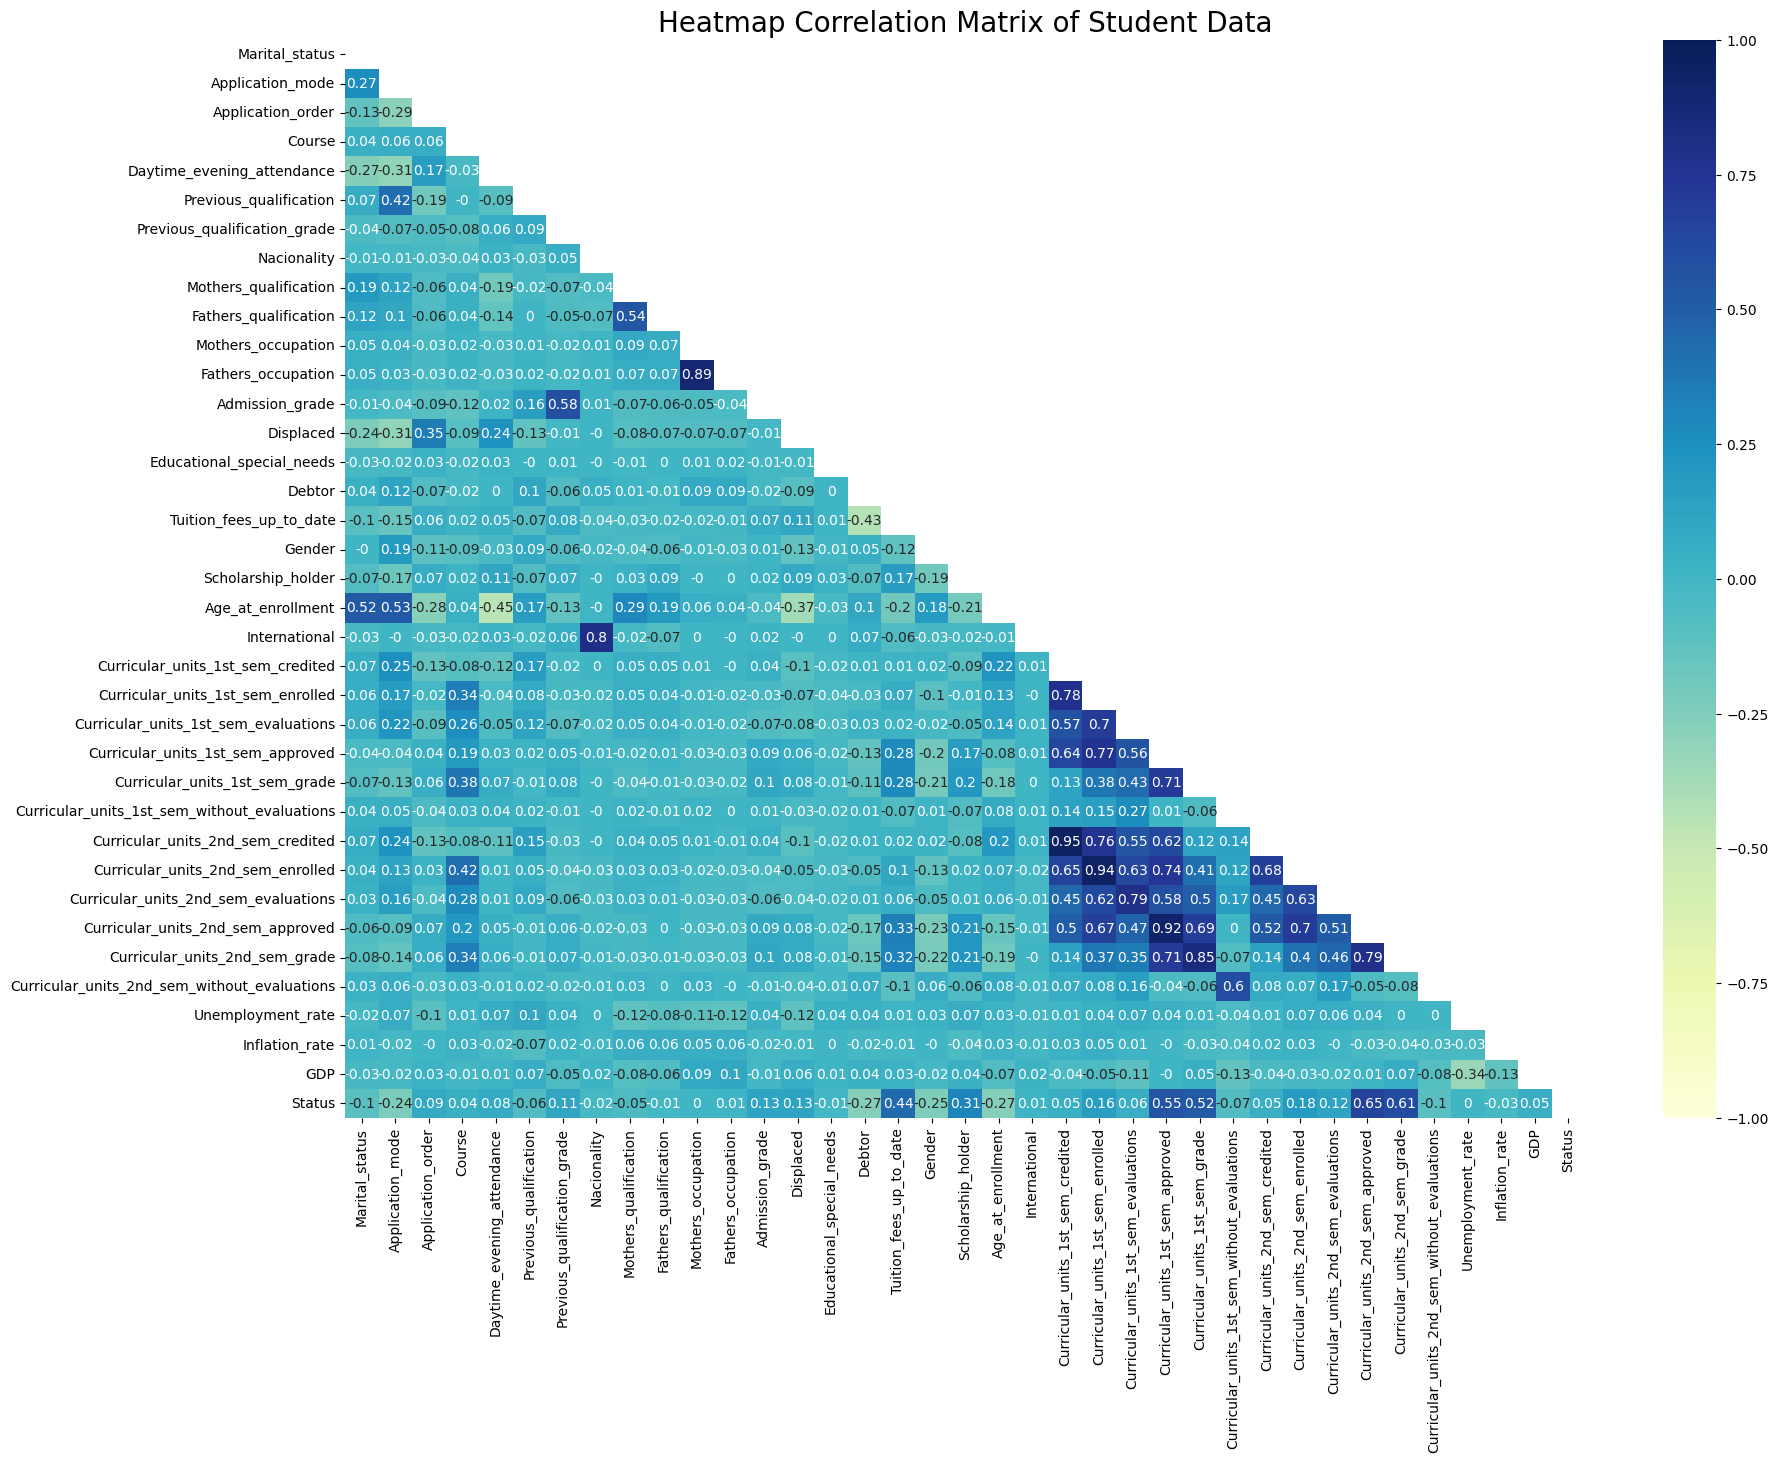

In [16]:
plt.figure(figsize=(20, 14))
correlation_matrix = df.corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1,annot=True, cmap='YlGnBu', mask=mask)
plt.title('Heatmap Correlation Matrix of Student Data', size=20)
plt.show()
     

**Pengaruh Fitur terhadap Status**

* **Fitur dengan pengaruh cukup kuat terhadap Status:**

  * `Curricular_units_2nd_sem_approved`
  * `Curricular_units_2nd_sem_grade`

* **Fitur dengan pengaruh sedang terhadap Status:**

  * `Curricular_units_1nd_sem_approved`
  * `Curricular_units_1nd_sem_grade`
  * `Tuition_fees_up_to_date`
  * `Scholarship_holder`

* **Fitur dengan pengaruh rendah terhadap Status:**

  * `Age_at_enrollment`
  * `Debtor`
  * `Gender`
  * `Applicatoin_mode` *(kemungkinan typo dari `Application_mode`)*

* **Fitur lainnya memiliki pengaruh yang sangat lemah terhadap Status.**


Dalam feature selection, dilakukan drop semua fitur data yang memiliki nilai korelasi absolut kurang dari 0,1.

In [17]:
df_filtered = df.loc[:, df.corr()['Status'].abs().ge(0.1)]
df_filtered

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,122.0,127.3,1,0,1,1,0,20,0,0,0.000000,0,0,0,0.000000,0,0
1,1,15,160.0,142.5,1,0,0,1,0,19,6,6,14.000000,6,6,6,13.666667,0,1
2,1,1,122.0,124.8,1,0,0,1,0,19,6,0,0.000000,6,0,0,0.000000,0,0
3,1,17,122.0,119.6,1,0,1,0,0,20,6,6,13.428571,6,10,5,12.400000,0,1
4,2,39,100.0,141.5,0,0,1,0,0,45,6,5,12.333333,6,6,6,13.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,125.0,122.2,0,0,1,1,0,19,6,5,13.600000,6,8,5,12.666667,0,1
3626,1,1,120.0,119.0,1,1,0,0,0,18,6,6,12.000000,6,6,2,11.000000,0,0
3627,1,1,154.0,149.5,1,0,1,0,1,30,7,7,14.912500,8,9,1,13.500000,0,0
3628,1,1,180.0,153.8,1,0,1,0,1,20,5,5,13.800000,5,6,5,12.000000,0,1


In [18]:
df_filtered.to_csv('student_data_filtered.csv', index=False)

### Spliiting dan Standarisasi

In [19]:
x=df_filtered.drop(columns='Status')
y=df_filtered['Status']

# Membagi data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

# Standarisasi menggunakan Min Max Scaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Penjelasan:**

Fitur-fitur (variabel independen) dipisahkan dari target ('Status') untuk membedakan input dan output model. Selanjutnya, data dibagi menjadi data latih (train) dan data uji (test) dengan proporsi 80:20 menggunakan stratified sampling agar distribusi kelas target tetap seimbang pada kedua subset. 

Selanjutnya, dilakukan standarisasi dengan MinMaxScaler untuk mengubah skala semua fitur ke rentang 0–1. Ini penting karena algoritma machine learning sangat sensitif terhadap skala fitur; jika tidak distandarisasi, fitur dengan nilai besar bisa mendominasi proses pembelajaran dan merusak performa model.

## Modeling

### k-Nearest Neighbors Modelling dengan Hyperparameter Tuning menggunakan Optuna

In [20]:
def objective_knn(trial):
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 3, 10),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'p': trial.suggest_int('p', 1, 2)  # Parameter untuk metrik Minkowski (1=Manhattan, 2=Euclidean)
    }
    
    model = KNeighborsClassifier(**params)
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    score = balanced_accuracy_score(y_test, y_pred_test)
    return score

study_knn = optuna.create_study(direction='maximize', sampler=TPESampler(seed=13))
study_knn.optimize(objective_knn, n_trials=10)

# Menampilkan hasil terbaik
print("Best KNN Parameters:", study_knn.best_params)

modelKNN = KNeighborsClassifier(**study_knn.best_params)

[I 2025-06-18 06:12:19,360] A new study created in memory with name: no-name-982eb839-1009-483b-98e2-87604763dcd7
[I 2025-06-18 06:12:19,434] Trial 0 finished with value: 0.7979255624243197 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.7979255624243197.
[I 2025-06-18 06:12:19,452] Trial 1 finished with value: 0.7903814288445605 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.7979255624243197.
[I 2025-06-18 06:12:19,518] Trial 2 finished with value: 0.8355267350710598 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'p': 1}. Best is trial 2 with value: 0.8355267350710598.
[I 2025-06-18 06:12:19,564] Trial 3 finished with value: 0.7842314065387802 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'p': 2}. Best is trial 2 with value: 0.8355267350710598.
[I 2025-06-18 06:12:19,630] Trial 4 finished with value: 0.8126394111273978 and parameters: {'n_neighbors': 5, 'weights': '

Best KNN Parameters: {'n_neighbors': 8, 'weights': 'uniform', 'p': 1}


### Random Forest Modelling dengan Hyperparameter Tuning menggunakan Optuna

In [21]:
def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
    }
    
    model = RandomForestClassifier(**params, random_state=13)
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    score = balanced_accuracy_score(y_test, y_pred_test)
    return score

study_rf = optuna.create_study(direction='maximize', sampler=TPESampler(seed=13))
study_rf.optimize(objective_rf, n_trials=10)

print("Best RF Parameters:", study_rf.best_params)
modelRF = RandomForestClassifier(**study_rf.best_params, random_state=13)

[I 2025-06-18 06:12:19,794] A new study created in memory with name: no-name-1fc91095-95ef-469e-91a0-1bbdd83cddf0
[I 2025-06-18 06:12:20,568] Trial 0 finished with value: 0.8907255751704799 and parameters: {'n_estimators': 245, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.8907255751704799.
[I 2025-06-18 06:12:21,085] Trial 1 finished with value: 0.8730004461156077 and parameters: {'n_estimators': 231, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.8907255751704799.
[I 2025-06-18 06:12:21,300] Trial 2 finished with value: 0.8924861385507616 and parameters: {'n_estimators': 52, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}. Best is trial 2 with value: 0.8924861385507616.
[I 2025-06-18 06:12:21,911] Trial 3 finished with value: 0.8747610094958893 

Best RF Parameters: {'n_estimators': 52, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}


**Penjelasan:**

Tahapan selanjutnya adalah pemodelan yang dilakukan menggunakan algoritma KNN dan Random Forest. Dalam menentukan hyperparameter yang dapat mengoptimalkan kedua algoritma, digunakan library optuna yang menerapkan Algoritma Tree Parzen Structure untuk melakukan pencarian hyperparameter atau dikenal dengan hyperparameter tuning untuk algoritma KNN dan Random Forest.

## Evaluation

### Pendefinisian Fungsi Evaluasi dan Visualisasi Performa Model

In [22]:
def evaluasiModel(judul, model, X_train, y_train, X_test, y_test, save_dir="Model Tersimpan"):
    print(judul)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    # Evaluasi metrik
    bal_acc = balanced_accuracy_score(y_test, y_test_pred)
    f1_macro = f1_score(y_test, y_test_pred, average='macro')
    acc = accuracy_score(y_test, y_test_pred)

    # Cek apakah model mendukung predict_proba atau decision_function
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = None

    print("Final Balanced Accuracy pada Data Uji :", bal_acc)
    print("F1 Score (Macro) : ", f1_macro)
    print("Accuracy : ", acc)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Pred 0', 'Pred 1'], 
                yticklabels=['True 0', 'True 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # Simpan model
    os.makedirs(save_dir, exist_ok=True)
    model_path = os.path.join(save_dir, f"{judul.replace(' ', '_')}.pkl")
    # Simpan model dengan benar
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model disimpan di: {model_path}")

    return {
        "Skenario": judul,
        "Balanced Accuracy": bal_acc,
        "F1 Score (Macro)": f1_macro,
        "Accuracy": acc,
        "Model Path": model_path
    }

**Penjelasan:**

Fungsi ini bertujuan untuk melakukan evaluasi terhadap model machine learning yang dibangun. Terdapat 6 inputan judul, model, X_train, y_train, X_test, dan y_test. Kode ini bertujuan untuk menghasilkan ukuran evaluasi berupa Balanced Accuracy, Classification Report, dan Confusion Matrix.

### Evaluasi Model Klasifikasi

Model KNN
Final Balanced Accuracy pada Data Uji : 0.8355267350710598
F1 Score (Macro) :  0.8464072079845354
Accuracy :  0.859504132231405

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80       284
           1       0.84      0.95      0.89       442

    accuracy                           0.86       726
   macro avg       0.87      0.84      0.85       726
weighted avg       0.86      0.86      0.86       726



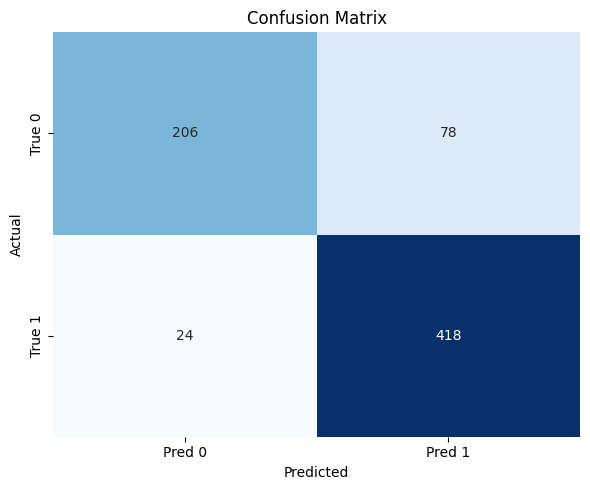

Model disimpan di: Model Tersimpan/Model_KNN.pkl
Model Random Forest
Final Balanced Accuracy pada Data Uji : 0.8924861385507616
F1 Score (Macro) :  0.903035906919402
Accuracy :  0.9104683195592287

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       284
           1       0.89      0.98      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.89      0.90       726
weighted avg       0.91      0.91      0.91       726



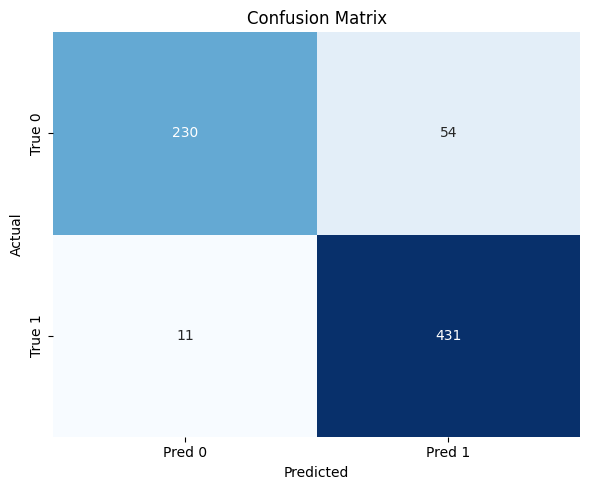

Model disimpan di: Model Tersimpan/Model_Random_Forest.pkl


In [23]:
hasil1 = evaluasiModel("Model KNN", modelKNN, x_train, y_train, x_test, y_test)
hasil2 = evaluasiModel("Model Random Forest",modelRF, x_train, y_train, x_test, y_test)

In [24]:
df_hasil = pd.DataFrame([hasil1, hasil2])
df_hasil

,Skenario,Balanced Accuracy,F1 Score (Macro),Accuracy,Model Path
0,Model KNN,0.835527,0.846407,0.859504,Model Tersimpan/Model_KNN.pkl
1,Model Random Forest,0.892486,0.903036,0.910468,Model Tersimpan/Model_Random_Forest.pkl


**Penjelasan:**

Berdasarkan pelatihan yang dilakukan terlihat bahwa model yang dibangun sudah cukup baik, di mana nilai akurasi berada di nilai > 80%. Pada hasil pencarian optuna untuk kedua algoritma diperoleh hyperparameter terbaik adalah sebagai berikut.

Model KNN = {'n_neighbors': 8, 'weights': 'uniform', 'p': 1}

Model Random Forest = {'n_estimators': 52, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}

Namun, pada nilai F-1 Score Macro dan Balanced Accuracy yang cenderung lebih tepat digunakan untuk mengukur performa model klasifikasi pada kondisi imbalanced dataset, terlihat bahwa nilai Balanced Accuracy dan F-1 Score Macro pada model Random Forest lebih tinggi dibanding KNN. Hal ini menunjukkan model Random Forest lebih baik dalam memprediksi pada keseluruhan class.

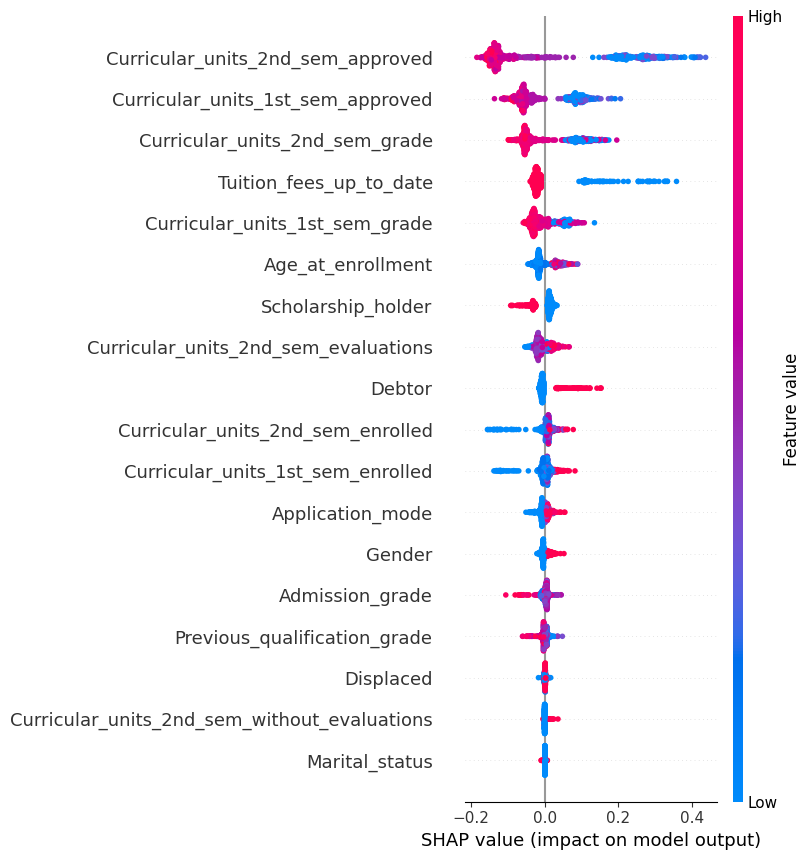

In [25]:
# SHAP untuk Random Forest
explainer = shap.TreeExplainer(modelRF)
shap_values = explainer.shap_values(x_test)

# Summary plot
shap.summary_plot(shap_values[0], x_test, plot_type="dot")

Visualisasi SHAP summary plot di atas menggambarkan seberapa besar pengaruh masing-masing fitur terhadap probabilitas seorang mahasiswa **dropout (kelas 0)** pada model Random Forest. `shap_values[0]` berarti ini untuk **kelas 0** → yaitu **mahasiswa yang dropout**. 

* Maka:

  * **SHAP value positif → mendorong ke dropout**
  * **SHAP value negatif → mendorong ke tidak dropout (bertahan)**

### Fitur Paling Berpengaruh terhadap Prediksi **Dropout**

1. **Curricular\_units\_2nd\_sem\_approved**

   * Mahasiswa yang **meluluskan banyak mata kuliah semester 2** (warna merah) → SHAP value **negatif** → **cenderung tidak dropout**.
   * Yang lulus sedikit (biru) → SHAP value **positif** → **cenderung dropout**.

2. **Curricular\_units\_1st\_sem\_approved**

   * Banyak mata kuliah yang disetujui di semester 1 → **menurunkan kemungkinan dropout**.
   * Sedikit yang disetujui → **meningkatkan kemungkinan dropout**.

3. **Curricular\_units\_2nd\_sem\_grade**

   * Nilai tinggi di semester 2 (merah) → **mendorong bertahan**.
   * Nilai rendah (biru) → **mendorong dropout**.

4. **Tuition\_fees\_up\_to\_date**

   * Mahasiswa dengan **pembayaran lancar** (merah) → **tidak dropout**.
   * Yang **menunggak** (biru) → **lebih berisiko dropout**.

5. **Curricular\_units\_1st\_sem\_grade**

   * Nilai tinggi semester 1 → **menurunkan risiko dropout**.
   * Nilai rendah → meningkatkan risiko.


#### Fitur Sosial-Ekonomi & Demografi

6. **Age\_at\_enrollment**

   * Mahasiswa yang masuk pada usia **lebih tua** (merah) → sedikit lebih **rentan dropout**.
   * Usia muda (biru) → cenderung bertahan.

7. **Scholarship\_holder**

   * Penerima beasiswa (merah) → SHAP negatif → **lebih aman dari dropout**.
   * Tanpa beasiswa (biru) → lebih berisiko dropout.

8. **Debtor**

   * Mahasiswa dengan utang (merah) → **lebih cenderung dropout**.
   * Tanpa utang (biru) → lebih aman.

9. **Curricular\_units\_2nd\_sem\_evaluations**

   * Mahasiswa yang **tidak banyak mengikuti evaluasi** semester 2 → lebih berisiko dropout.
   * Lebih banyak evaluasi → cenderung bertahan.

10. **Curricular\_units\_2nd\_sem\_enrolled**

    * Mahasiswa yang mendaftar lebih sedikit mata kuliah semester 2 (biru) → **lebih berisiko dropout**.

#### Ringkasan

> Model menunjukkan bahwa risiko mahasiswa dropout sangat berkaitan dengan **kinerja akademik awal**, **dukungan finansial**, dan **status sosial ekonomi**:
>
> * Mahasiswa dengan **nilai rendah**, **jumlah mata kuliah yang gagal banyak**, serta **tunggakan biaya kuliah** memiliki risiko dropout tinggi.
> * Dukungan seperti **beasiswa**, **nilai awal yang tinggi**, dan **keaktifan dalam evaluasi semester** terbukti menurunkan kemungkinan dropout.
> * Faktor usia dan gender juga berkontribusi kecil, di mana mahasiswa **lebih tua** dan **laki-laki** sedikit lebih rentan dropout.
